In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error,root_mean_squared_error


In [4]:
df = pd.read_csv(r'C:\Users\mhija\Desktop\new things\DATA\rock_density_xray.csv')
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [5]:
def run_model(model,X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #get metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')

    # plot the results
    signal_range = np.arange(0,100)
    predicted_density = model.predict(signal_range.reshape(-1, 1))
    plt.figure(figsize=(10, 6),dpi=100)
    sns.scatterplot(x='Rebound Signal Strength nHz', y='Rock Density kg/m3', data=df)
    plt.plot(signal_range, predicted_density, color='red', label='Predicted Density')

Mean Absolute Error: 0.12776528499754056
Root Mean Squared Error: 0.1433180629627557


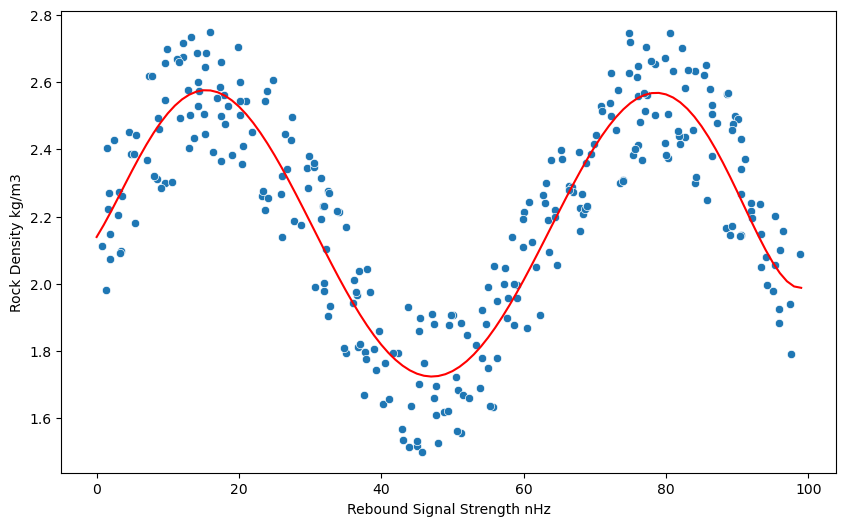

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['Rebound Signal Strength nHz'].values.reshape(-1, 1)
y = df['Rock Density kg/m3']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)

pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)



Mean Absolute Error: 0.11903817237608924
Root Mean Squared Error: 0.16631738413047167
Mean Absolute Error: 0.12914730151577988
Root Mean Squared Error: 0.14876656913494596
Mean Absolute Error: 0.12674710216600582
Root Mean Squared Error: 0.14614466625378272


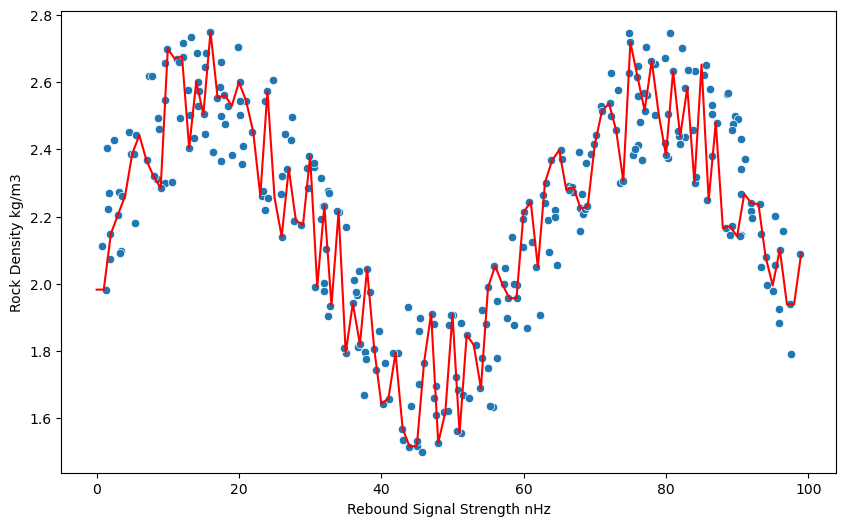

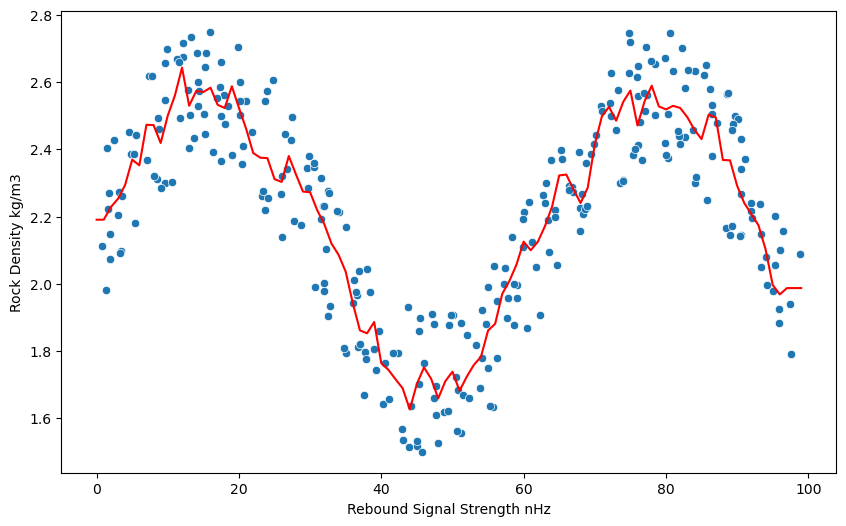

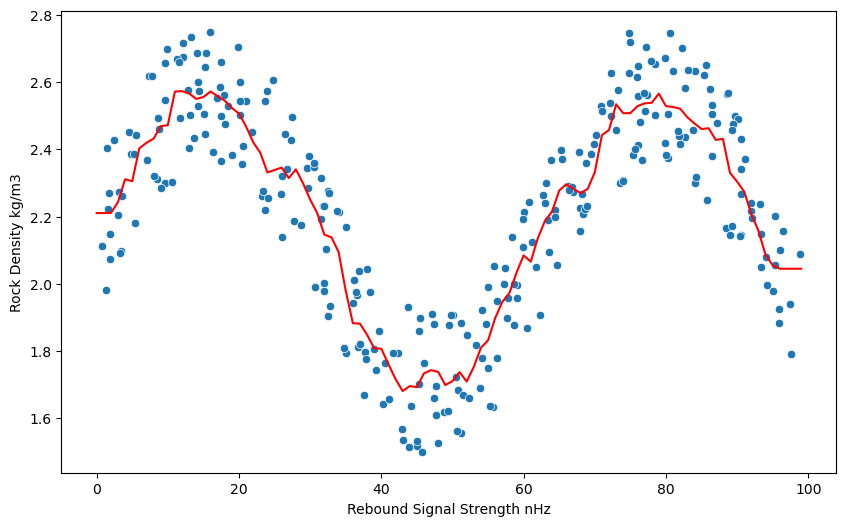

In [7]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [1,5,10]
for n in k_values:
  knn = KNeighborsRegressor(n_neighbors=n)
  run_model(knn, X_train, y_train, X_test, y_test)

Mean Absolute Error: 0.11903817237608924
Root Mean Squared Error: 0.16631738413047167


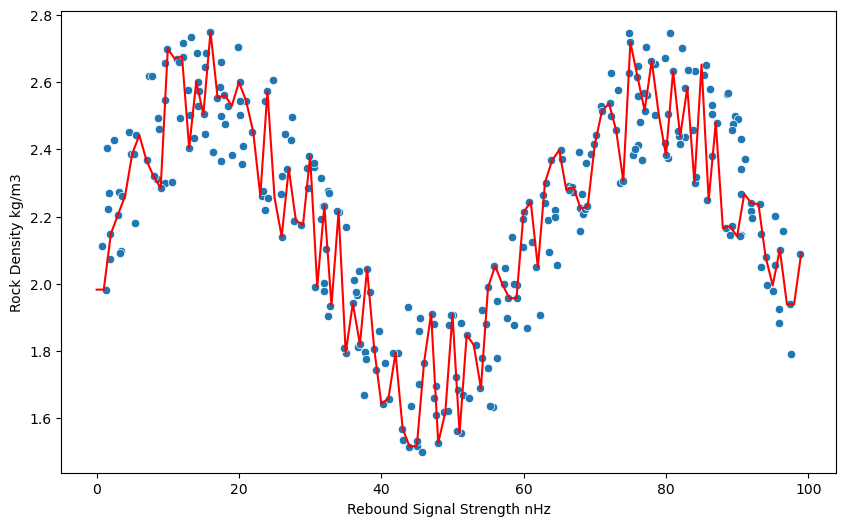

In [8]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
run_model(tree, X_train, y_train, X_test, y_test)

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1,5,10,100,1000],
    'gamma': ['scale', 'auto']
}
svr = SVR()

Mean Absolute Error: 0.128024475604342
Root Mean Squared Error: 0.14350089737227528


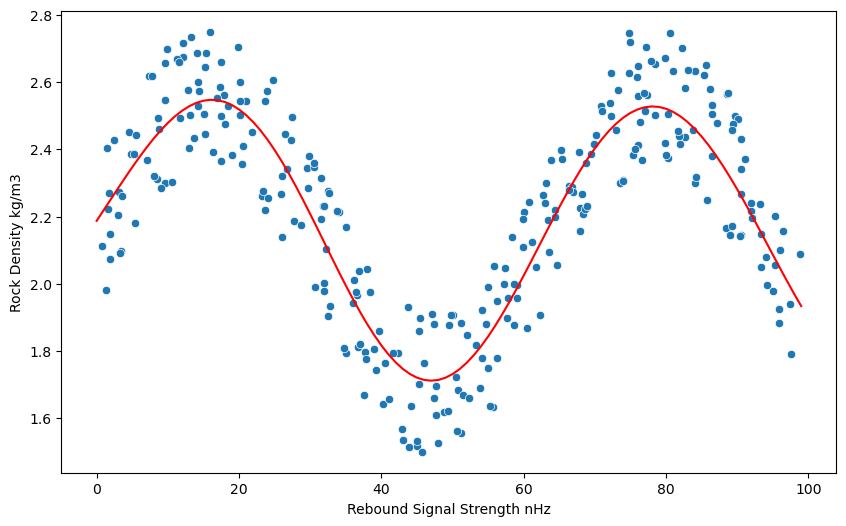

In [10]:
grid_model = GridSearchCV(svr, param_grid)
run_model(grid_model, X_train, y_train, X_test, y_test)

Mean Absolute Error: 0.13028044498456184
Root Mean Squared Error: 0.15873879055909507
Mean Absolute Error: 0.12441475403674564
Root Mean Squared Error: 0.149460416359699
Mean Absolute Error: 0.1248945936731426
Root Mean Squared Error: 0.14991376502107026
Mean Absolute Error: 0.1242394396549499
Root Mean Squared Error: 0.1486301436624799


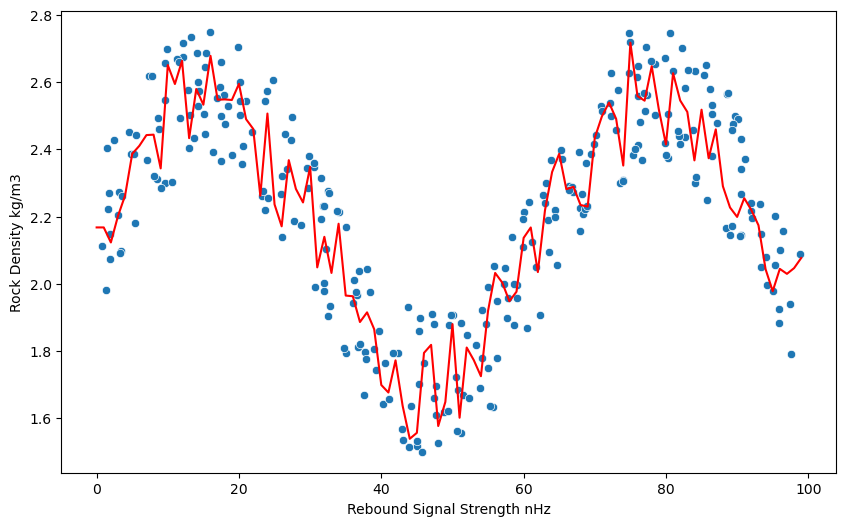

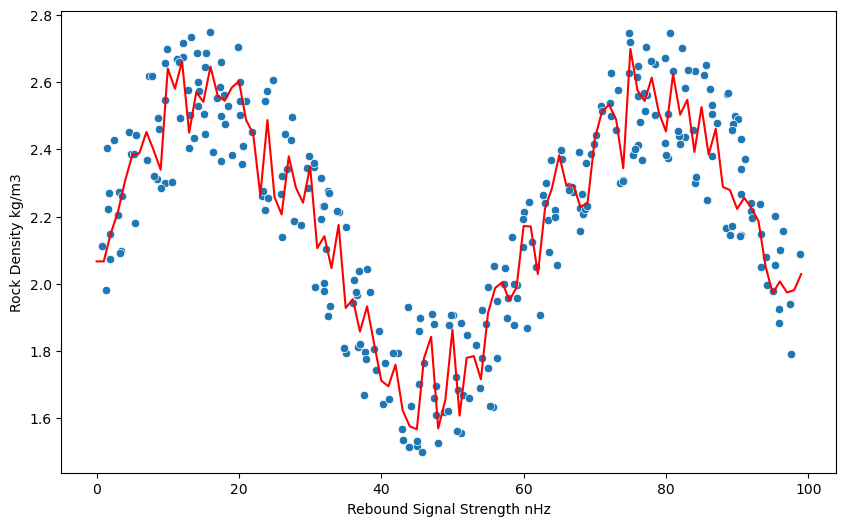

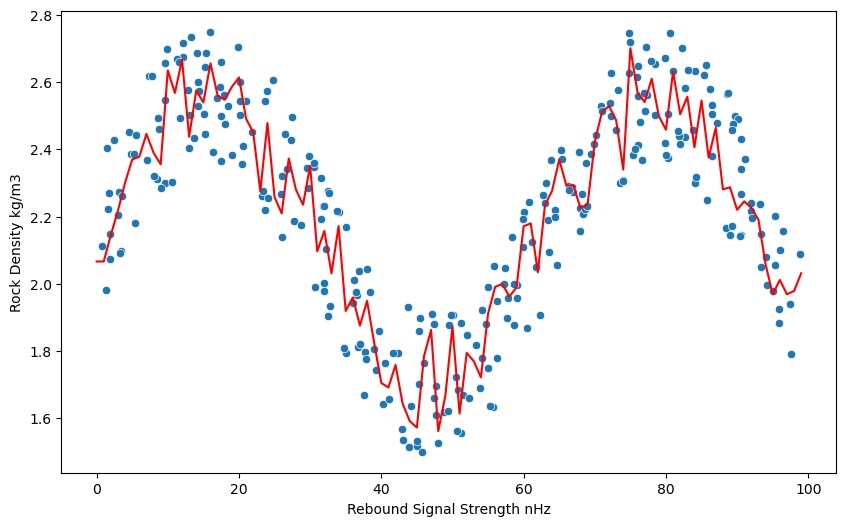

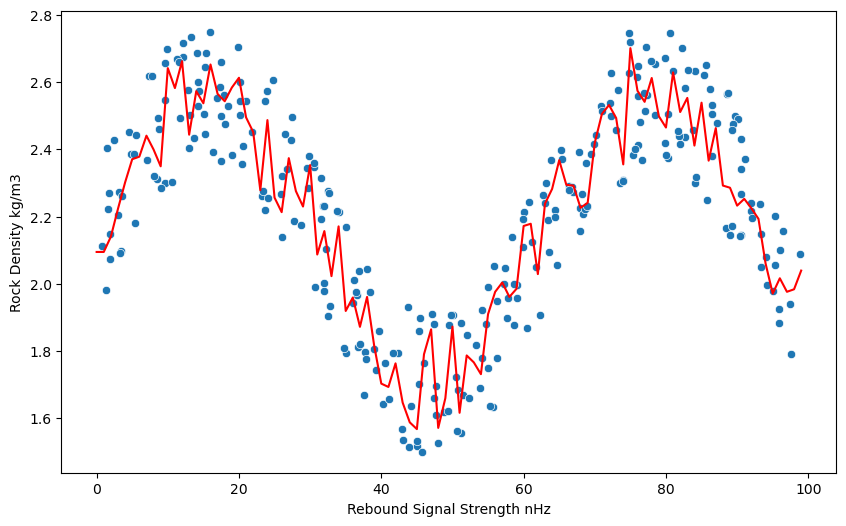

In [11]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = [10, 50, 100, 200]

for i in n_estimators :
    rfr = RandomForestRegressor(n_estimators=i, random_state=42)
    run_model(rfr, X_train, y_train, X_test, y_test)


Mean Absolute Error: 0.12761159125406576
Root Mean Squared Error: 0.1484821813155971


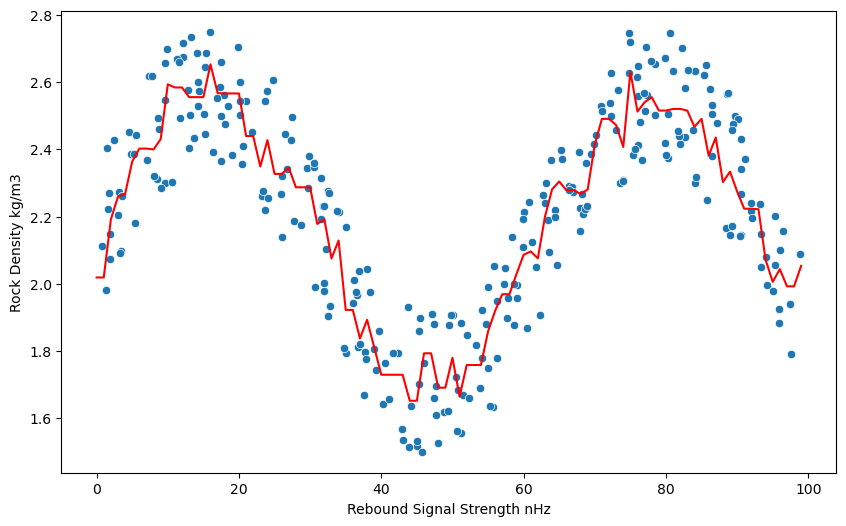

In [12]:
from sklearn.ensemble import GradientBoostingRegressor ,AdaBoostRegressor
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

Mean Absolute Error: 0.1300521809261621
Root Mean Squared Error: 0.14833308539418075


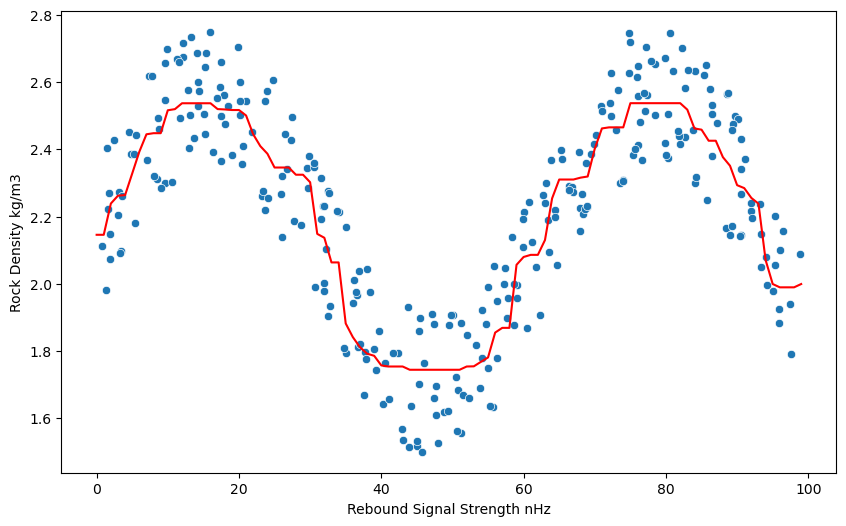

In [13]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)